In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
class Perceptron:
    def __init__(self, max_iter=200, learning_rate=0.05):
        self.max_iter = max_iter
        self.learning_rate = learning_rate
    
    def activation_function_(self, X):
        return np.where(np.dot(X, self.coef_) + self.intercept_ >= 0.0, 1, 0)
    
    def fit(self, X, y):
        self.coef_ = np.ones(X.shape[1])
        self.intercept_ = 0
        for _ in range(self.max_iter):
            for x, expected_value in zip(X, y):
                predicted_value = self.activation_function_(x)
                if predicted_value != expected_value:
                    self.coef_ += self.learning_rate * (expected_value - predicted_value) * x
                    self.intercept_ += self.learning_rate * (expected_value - predicted_value) * 1
        return self
    
    def predict(self, X):
        return self.activation_function_(X)

In [3]:
def plot_decision_regions(X, y, clf):
    plt.rcParams['figure.figsize'] = [9, 6]
    h = .02  # step size in the mesh
    
    # Generate a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Assign a color to each data point in the mesh [x_min, m_max]x[y_min, y_max]
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    # Plot the test data points
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', cmap='RdBu_r', alpha=.7)

    # Plot the decision boundary
    plt.contour(xx, yy, Z, cmap='Greys')

## Linearly Separable Data

In [4]:
ls_data_class1 = pd.read_csv('ls_data/Class1.txt', delimiter = ',', names = ['column1','column2'])
ls_data_class2 = pd.read_csv('ls_data/Class2.txt', delimiter = ',', names = ['column1','column2'])
ls_data_class1['class'] = 0;
ls_data_class2['class'] = 1;
result = pd.concat([ls_data_class1, ls_data_class2], axis=0)
result = result.reset_index(drop=True)
Y = result['class']
X = result.drop('class', axis = 1)
X_train, X_test, Y_train, Y_test = map(np.array, train_test_split(X, Y, test_size=0.3, random_state=0))

### Classification using Perceptron

In [5]:
clf = Perceptron().fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print('Test accuracy: {}%'.format(accuracy_score(Y_test, Y_pred) * 100))
print('Confusion matrix:\n', confusion_matrix(Y_test, Y_pred))

Test accuracy: 100.0%
Confusion matrix:
 [[308   0]
 [  0 292]]


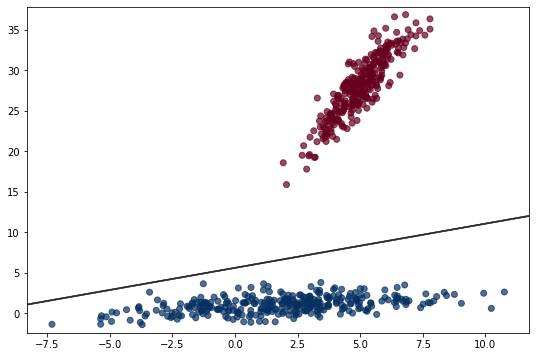

In [6]:
plot_decision_regions(X_test, Y_test, clf)

### Classification using MLP

In [7]:
clf = MLPClassifier().fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print('Test accuracy: {}%'.format(accuracy_score(Y_test, Y_pred) * 100))
print('Confusion matrix:\n', confusion_matrix(Y_test, Y_pred))

Test accuracy: 100.0%
Confusion matrix:
 [[308   0]
 [  0 292]]


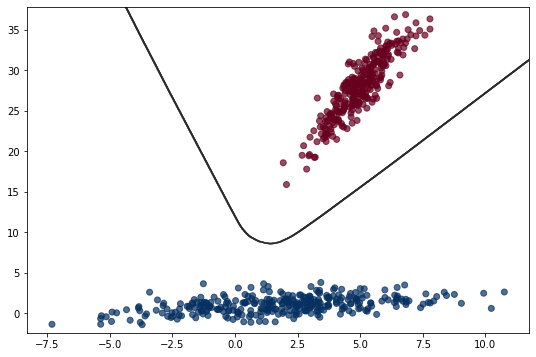

In [8]:
plot_decision_regions(X_test, Y_test, clf)

### Classification using SVM

In [9]:
clf = SVC(C=0.1, gamma=1, kernel='linear').fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print('Test accuracy: {}%'.format(accuracy_score(Y_test, Y_pred) * 100))
print('Confusion matrix:\n', confusion_matrix(Y_test, Y_pred))

Test accuracy: 100.0%
Confusion matrix:
 [[308   0]
 [  0 292]]


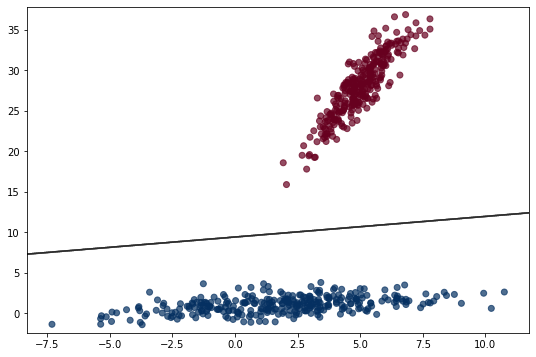

In [10]:
plot_decision_regions(X_test, Y_test, clf)

## Non-Linearly Separable Data

In [11]:
nls_data_class1 = pd.read_csv('nls_data/Class1.txt',delimiter = ',', names = ['column1','column2'])
nls_data_class2 = pd.read_csv('nls_data/Class2.txt',delimiter = ',', names = ['column1','column2'])
nls_data_class1['class'] = 0;
nls_data_class2['class'] = 1;
result = pd.concat([nls_data_class1, nls_data_class2], axis=0)
result = result.reset_index(drop=True)
Y = result['class']
X = result.drop('class', axis = 1)
X_train, X_test, Y_train, Y_test = map(np.array, train_test_split(X, Y, test_size=0.3, random_state=0))

### Classification using Perceptron

In [12]:
clf = Perceptron().fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print('Test accuracy: {}%'.format(accuracy_score(Y_test, Y_pred) * 100))
print('Confusion matrix:\n', confusion_matrix(Y_test, Y_pred))

Test accuracy: 89.16666666666667%
Confusion matrix:
 [[251  57]
 [  8 284]]


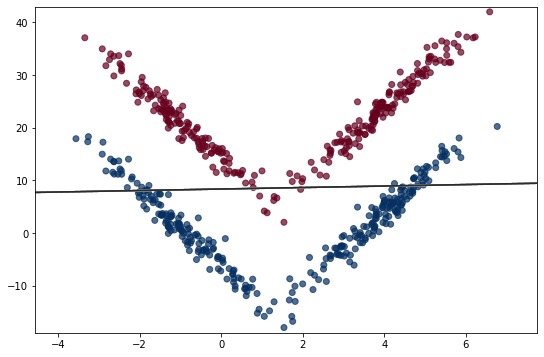

In [13]:
plot_decision_regions(X_test, Y_test, clf)

### Classification using MLP

In [14]:
clf = MLPClassifier(hidden_layer_sizes=(50, 50, 50)).fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print('Test accuracy: {}%'.format(accuracy_score(Y_test, Y_pred) * 100))
print('Confusion matrix:\n', confusion_matrix(Y_test, Y_pred))

Test accuracy: 100.0%
Confusion matrix:
 [[308   0]
 [  0 292]]


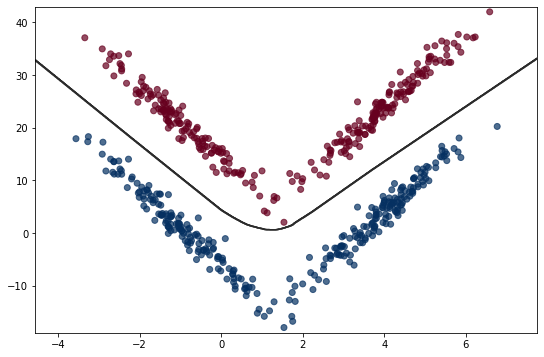

In [15]:
plot_decision_regions(X_test, Y_test, clf)

### Classification using SVM

In [16]:
clf = SVC(C=1, gamma=0.1).fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print('Test accuracy: {}%'.format(accuracy_score(Y_test, Y_pred) * 100))
print('Confusion matrix:\n', confusion_matrix(Y_test, Y_pred))

Test accuracy: 100.0%
Confusion matrix:
 [[308   0]
 [  0 292]]


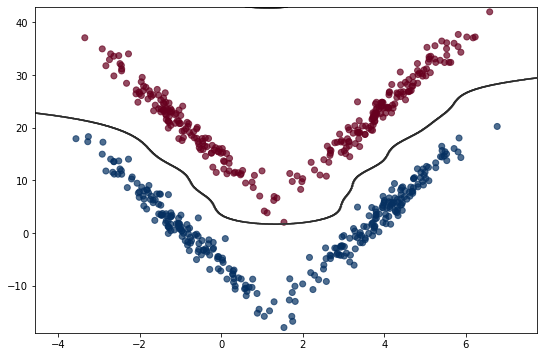

In [17]:
plot_decision_regions(X_test, Y_test, clf)